In [164]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import json
import re
import gc

#to make json in flatten object
from flatten_json import flatten

#For plotting
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

#Prediction related model
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Until fuction: line seperator
def print_dashes_and_ln():
    print('-'*100, '\n')
    
# Formatter to display all float format in 2 decimal format
#pd.options.display.float_format = '{:.2f}'.format

import warnings
warnings.filterwarnings('ignore')

In [165]:
#Json file opening, parsing in strin and flattened after that data frame is creating.
f = open('stats_match.json')
data = json.load(f)
f.close()
data_flattened = [flatten(d) for d in data]
print(data_flattened)
match_df = pd.DataFrame(data_flattened)
match_df.head()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



,events_event_0_clock,events_event_0_defender_id,events_event_0_defenders,events_event_0_defenders_0,events_event_0_defenders_1,events_event_0_defending_all_out_points,events_event_0_defending_bonus_points,events_event_0_defending_capture_points,events_event_0_defending_points,events_event_0_defending_team_id,...,zones_zone_5_id,zones_zone_5_name,zones_zone_6_id,zones_zone_6_name,zones_zone_7_id,zones_zone_7_name,zones_zone_8_id,zones_zone_8_name,zones_zone_9_id,zones_zone_9_name
0,20:00,NaN,NaN,157.0,311.0,0,0,0,0,2,...,6,Baulk Left,7,Baulk Centre,8,Baulk Right,9,Bonus Left,10,Bonus Centre
1,20:00,NaN,[],NaN,NaN,0,0,0,0,29,...,6,Baulk Left,7,Baulk Centre,8,Baulk Right,9,Bonus Left,10,Bonus Centre
2,19:58,NaN,NaN,42.0,NaN,0,0,0,0,28,...,6,Baulk Left,7,Baulk Centre,8,Baulk Right,9,Bonus Left,10,Bonus Centre
3,20:00,NaN,[],NaN,NaN,0,0,0,0,2,...,6,Baulk Left,7,Baulk Centre,8,Baulk Right,9,Bonus Left,10,Bonus Centre
4,19:58,NaN,NaN,481.0,NaN,0,0,0,0,2,...,6,Baulk Left,7,Baulk Centre,8,Baulk Right,9,Bonus Left,10,Bonus Centre


# 1. Data Cleaning and manipulation

In [166]:
# getting total number of rows and column in the dataframe
def shape_of_dataframe(match_df):
    print(f" Shape of the dataframe = {match_df.shape}"); print_dashes_and_ln();
    totalrows=match_df.shape[0]
    print(f" Total number of rows in the dataset =  {totalrows}"); print_dashes_and_ln();
shape_of_dataframe(match_df)

 Shape of the dataframe = (232, 6673)
---------------------------------------------------------------------------------------------------- 

 Total number of rows in the dataset =  232
---------------------------------------------------------------------------------------------------- 



In [167]:
# Drop unwanted columns
columns_to_drop = list(match_df.filter(regex="^(events|zones|match_detail_clock|match_detail_clock|match_detail_date|match_detail_start_time"
                                           +"|match_detail_gmtoffset|match_detail_status|match_detail_status|match_detail_result_outcome|match_detail_result_value|match_detail_player_of_the_match"
                                          +"|match_detail_series_parent_series|match_detail_venue|match_detail_stage|match_detail_group"
                                          +"|teams_home_team|teams_team_._state_of_play"
                                           +"|teams_team_._stats_points_all_out|teams_team_._stats_points_declare"
                                           +"|teams_team_._stats_points_raid_points|teams_team_._stats_points_tackle_points"
                                           +"|teams_team_._squad).*", axis = 1).columns)

match_df.drop(columns_to_drop, inplace=True, axis = 1)

In [168]:
# after dropping the required columns we have n columns in the data
shape_of_dataframe(match_df)

 Shape of the dataframe = (232, 51)
---------------------------------------------------------------------------------------------------- 

 Total number of rows in the dataset =  232
---------------------------------------------------------------------------------------------------- 



In [169]:
#Remove Columns with only One Value
match_df = match_df.loc[:,match_df.apply(pd.Series.nunique) > 1]

In [170]:
#Renaming of column name which help to shortane the column name with proper name.
match_df.rename(columns=lambda x: x.replace('match_detail_result', 'result'), inplace=True)
match_df.rename(columns=lambda x: x.replace('teams_team', 'team'), inplace=True)
match_df.rename(columns=lambda x: x.replace('match_detail', 'match'), inplace=True)
match_df.rename(columns=lambda x: x.replace('stats_raids', 'raid'), inplace=True)
match_df.rename(columns=lambda x: x.replace('stats_tackles', 'tackle'), inplace=True)

In [171]:
# After cleaning and manupulation dataframe will look like
match_df.head()

,match_match_id,match_match_number,match_matchtime_iso,result_winning_method,result_winning_team,result_winning_team_id,match_toss_winner,team_0_green_card_count,team_0_id,team_0_name,...,team_1_stats_points_total,team_1_raid_Empty,team_1_raid_successful,team_1_raid_super_raids,team_1_raid_total,team_1_raid_unsuccessful,team_1_tackle_successful,team_1_tackle_super_tackles,team_1_tackle_total,team_1_tackle_unsuccessful
0,1692,Match 8,7/24/2019 15:00:00,W,Dabang Delhi K.C.,2.0,2,1,8,Telugu Titans,...,34,12,23,0,39,4,6,1,24,18
1,1693,Match 9,7/25/2019 14:00:00,W,Dabang Delhi K.C.,2.0,29,0,2,Dabang Delhi K.C.,...,29,17,11,0,37,9,10,2,21,11
2,1698,Match 14,7/28/2019 14:00:00,W,Dabang Delhi K.C.,2.0,28,0,2,Dabang Delhi K.C.,...,21,14,12,0,36,10,4,0,23,19
3,1704,Match 20,8/1/2019 14:00:00,W,Gujarat Fortunegiants,31.0,2,0,31,Gujarat Fortunegiants,...,26,18,11,0,39,10,8,1,19,11
4,1711,Match 27,8/5/2019 14:00:00,W,Dabang Delhi K.C.,2.0,2,0,2,Dabang Delhi K.C.,...,24,15,13,1,38,10,3,0,21,18


In [172]:
#Remove or substitute respective relevant value for nan and none with in a data frame
#1. Data frame columns containg null value
def columns_cointaing_null_value(match_df):
    match_df_contianing_null = match_df.columns[match_df.isna().any()].tolist()
    print(f'Column containing null values are: = {match_df_contianing_null}'); print_dashes_and_ln();
columns_cointaing_null_value(match_df)
#2. Fill NaN with the mean of the column
match_df['result_winning_team'] = match_df['result_winning_team'].fillna('Tie Match')
match_df['result_winning_team_id'] = match_df['result_winning_team_id'].fillna(0)
#3 Value in the both column is as shown below.
match_df_win_team_id = match_df[['result_winning_team','result_winning_team_id']]
print(match_df_win_team_id.head())
#4. recheck if there is any null value still persist.
columns_cointaing_null_value(match_df)

Column containing null values are: = ['result_winning_team', 'result_winning_team_id']
---------------------------------------------------------------------------------------------------- 

     result_winning_team  result_winning_team_id
0      Dabang Delhi K.C.                     2.0
1      Dabang Delhi K.C.                     2.0
2      Dabang Delhi K.C.                     2.0
3  Gujarat Fortunegiants                    31.0
4      Dabang Delhi K.C.                     2.0
Column containing null values are: = []
---------------------------------------------------------------------------------------------------- 



In [173]:
#Inforamtion of datatype of columns of data frame
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 41 columns):
match_match_id                 232 non-null int64
match_match_number             232 non-null object
match_matchtime_iso            232 non-null object
result_winning_method          232 non-null object
result_winning_team            232 non-null object
result_winning_team_id         232 non-null float64
match_toss_winner              232 non-null int64
team_0_green_card_count        232 non-null int64
team_0_id                      232 non-null object
team_0_name                    232 non-null object
team_0_score                   232 non-null int64
team_0_short_name              232 non-null object
team_0_stats_all_outs          232 non-null int64
team_0_stats_points_extras     232 non-null int64
team_0_stats_points_total      232 non-null int64
team_0_raid_Empty              232 non-null int64
team_0_raid_successful         232 non-null int64
team_0_raid_super_raids        232 n

In [174]:
#data type of different columns with object
def list_of_object_dtype_columns(match_df):
    match_df_object_dtype = match_df.select_dtypes(include=['object']).columns.tolist()
    print(f'list of columns with datatype object = {match_df_object_dtype}'); print_dashes_and_ln();
list_of_object_dtype_columns(match_df)

list of columns with datatype object = ['match_match_number', 'match_matchtime_iso', 'result_winning_method', 'result_winning_team', 'team_0_id', 'team_0_name', 'team_0_short_name', 'team_1_id', 'team_1_name', 'team_1_short_name']
---------------------------------------------------------------------------------------------------- 



In [175]:
#Converting float type column to int for better visualization.
#There some of columns which values are in float, objects etc but is needed integer type.
match_df['result_winning_team_id'] = match_df['result_winning_team_id'].astype(int)
#match time iso to date time
match_df['match_matchtime_iso']=pd.to_datetime(match_df['match_matchtime_iso'])
# Match Team Id to numeric
match_df['team_0_id']=pd.to_numeric(match_df['team_0_id'])
match_df['team_1_id']=pd.to_numeric(match_df['team_1_id'])

#Printing all object type columns names
list_of_object_dtype_columns(match_df)

#There is no need to further change object to other datatype
match_df.info()

list of columns with datatype object = ['match_match_number', 'result_winning_method', 'result_winning_team', 'team_0_name', 'team_0_short_name', 'team_1_name', 'team_1_short_name']
---------------------------------------------------------------------------------------------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 41 columns):
match_match_id                 232 non-null int64
match_match_number             232 non-null object
match_matchtime_iso            232 non-null datetime64[ns]
result_winning_method          232 non-null object
result_winning_team            232 non-null object
result_winning_team_id         232 non-null int64
match_toss_winner              232 non-null int64
team_0_green_card_count        232 non-null int64
team_0_id                      232 non-null int64
team_0_name                    232 non-null object
team_0_score                   232 non-null int64
team_0_short_name              232 non-null obj

In [176]:
# garbage collect (unused) object and delete all references that is no further used
gc.collect()

89

### Data is cleaned and relevent manupulation has been done.

#### ------------------------------------------------------------------------------------------------------------

# Visualizing Data and EDA For all the features

In [177]:
# create plotting functions
def data_type(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    elif variable.dtype == 'category':
        return 'categorical'
    
def univariate(variable, stats=True):
    
    if data_type(variable) == 'numerical':
        sns.distplot(variable)
        if stats == True:
            print(variable.describe())
    
    elif data_type(variable) == 'categorical':
        sns.countplot(variable)
        if stats == True:
            print(variable.value_counts())
            
    else:
        print("Invalid variable passed: either pass a numeric variable or a categorical vairable.")
        
def bivariate(var1, var2):
    if data_type(var1) == 'numerical' and data_type(var2) == 'numerical':
        sns.regplot(var1, var2)
    elif (data_type(var1) == 'categorical' and data_type(var2) == 'numerical') or (data_type(var1) == 'numerical' and data_type(var2) == 'categorical'):        
        sns.boxplot(var1, var2)

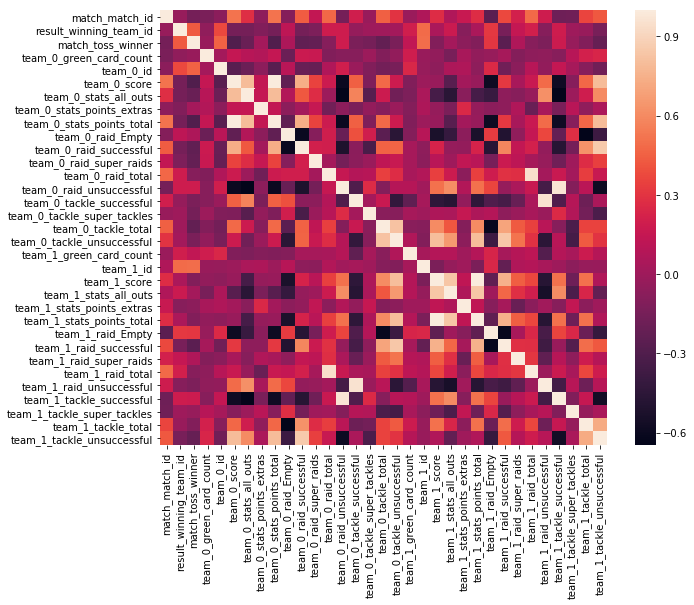

,match_match_id,result_winning_team_id,match_toss_winner,team_0_green_card_count,team_0_id,team_0_score,team_0_stats_all_outs,team_0_stats_points_extras,team_0_stats_points_total,team_0_raid_Empty,...,team_1_stats_points_total,team_1_raid_Empty,team_1_raid_successful,team_1_raid_super_raids,team_1_raid_total,team_1_raid_unsuccessful,team_1_tackle_successful,team_1_tackle_super_tackles,team_1_tackle_total,team_1_tackle_unsuccessful
match_match_id,1.000000,-0.025399,-0.154160,-0.133683,-0.069010,0.512431,0.279206,-0.058997,0.512431,-0.097495,...,0.272724,-0.258073,0.372396,0.214202,0.483537,0.183644,-0.182720,-0.175953,0.357470,0.425410
result_winning_team_id,-0.025399,1.000000,0.429253,-0.052291,0.375315,-0.154931,-0.152078,-0.111104,-0.154931,0.120363,...,0.049408,0.317525,-0.139264,0.149691,0.205384,-0.092957,0.186701,-0.002009,-0.017766,-0.144744
match_toss_winner,-0.154160,0.429253,1.000000,-0.018554,0.456506,-0.292829,-0.199370,0.026186,-0.292829,0.056023,...,-0.100230,0.306242,-0.256942,0.065936,-0.081266,-0.119756,0.182363,-0.024125,-0.100158,-0.210470
team_0_green_card_count,-0.133683,-0.052291,-0.018554,1.000000,0.022560,0.148605,0.099011,0.077484,0.148605,-0.190083,...,-0.041918,-0.023419,0.030079,-0.099494,-0.058876,-0.054151,-0.082186,0.095734,0.214920,0.236513
team_0_id,-0.069010,0.375315,0.456506,0.022560,1.000000,-0.265742,-0.193997,-0.062603,-0.265742,0.104799,...,-0.056485,0.256950,-0.170427,-0.073429,0.093285,-0.045954,0.147870,0.029917,-0.082102,-0.171402
team_0_score,0.512431,-0.154931,-0.292829,0.148605,-0.265742,1.000000,0.800003,0.139444,1.000000,-0.230178,...,-0.018922,-0.585131,0.315847,0.038462,0.167364,0.490492,-0.580670,-0.087794,0.474624,0.800082
team_0_stats_all_outs,0.279206,-0.152078,-0.199370,0.099011,-0.193997,0.800003,1.000000,0.146525,0.800003,0.077008,...,-0.342709,-0.397251,-0.060033,-0.080929,-0.025718,0.625848,-0.638004,-0.005476,0.193794,0.605664
team_0_stats_points_extras,-0.058997,-0.111104,0.026186,0.077484,-0.062603,0.139444,0.146525,1.000000,0.139444,-0.066927,...,-0.032141,-0.071978,-0.059443,0.069854,-0.196993,0.040909,-0.135550,0.100000,-0.051633,0.051245
team_0_stats_points_total,0.512431,-0.154931,-0.292829,0.148605,-0.265742,1.000000,0.800003,0.139444,1.000000,-0.230178,...,-0.018922,-0.585131,0.315847,0.038462,0.167364,0.490492,-0.580670,-0.087794,0.474624,0.800082
team_0_raid_Empty,-0.097495,0.120363,0.056023,-0.190083,0.104799,-0.230178,0.077008,-0.066927,-0.230178,1.000000,...,-0.525309,0.328169,-0.498455,-0.052750,0.148810,0.368586,-0.218942,0.277553,-0.646481,-0.387044


In [178]:
# Checking corelation
def corr_graph(match_df):
    corr = match_df.corr()
    plt.figure(figsize = (10, 8))
    sns.heatmap(corr)
    plt.show()
    return corr
corr_graph(match_df)

In [179]:
col_names = match_df.corr().columns.values

for col, row in (match_df.corr().abs() > 0.7).iteritems():
    print(col, col_names[row.values])

match_match_id ['match_match_id']
result_winning_team_id ['result_winning_team_id']
match_toss_winner ['match_toss_winner']
team_0_green_card_count ['team_0_green_card_count']
team_0_id ['team_0_id']
team_0_score ['team_0_score' 'team_0_stats_all_outs' 'team_0_stats_points_total'
 'team_0_raid_successful' 'team_1_tackle_unsuccessful']
team_0_stats_all_outs ['team_0_score' 'team_0_stats_all_outs' 'team_0_stats_points_total']
team_0_stats_points_extras ['team_0_stats_points_extras']
team_0_stats_points_total ['team_0_score' 'team_0_stats_all_outs' 'team_0_stats_points_total'
 'team_0_raid_successful' 'team_1_tackle_unsuccessful']
team_0_raid_Empty ['team_0_raid_Empty']
team_0_raid_successful ['team_0_score' 'team_0_stats_points_total' 'team_0_raid_successful'
 'team_1_tackle_unsuccessful']
team_0_raid_super_raids ['team_0_raid_super_raids']
team_0_raid_total ['team_0_raid_total' 'team_1_raid_total']
team_0_raid_unsuccessful ['team_0_raid_unsuccessful' 'team_1_tackle_successful']
team_0_t

# Adding Dummy Variables

In [180]:
# Finding corelated varibale with winning team
a = match_df[match_df.columns[:]].corr()['result_winning_team_id']


In [181]:
a1 = a[a >.1]
a2 = a[a < -.1]
a1

result_winning_team_id      1.000000
match_toss_winner           0.429253
team_0_id                   0.375315
team_0_raid_Empty           0.120363
team_0_raid_total           0.188862
team_0_raid_unsuccessful    0.184871
team_1_green_card_count     0.198488
team_1_id                   0.490190
team_1_stats_all_outs       0.173981
team_1_raid_Empty           0.317525
team_1_raid_super_raids     0.149691
team_1_raid_total           0.205384
team_1_tackle_successful    0.186701
Name: result_winning_team_id, dtype: float64

In [182]:
a2

team_0_score                 -0.154931
team_0_stats_all_outs        -0.152078
team_0_stats_points_extras   -0.111104
team_0_stats_points_total    -0.154931
team_0_raid_successful       -0.152031
team_0_raid_super_raids      -0.124498
team_1_raid_successful       -0.139264
team_1_tackle_unsuccessful   -0.144744
Name: result_winning_team_id, dtype: float64

In [183]:
# There is no futher deletion of column need to perform because each columns has its own importance.
# Neither need to add dummy variables.

count    232.000000
mean      12.603448
std       11.817427
min        1.000000
25%        4.000000
50%        6.000000
75%       28.000000
max       31.000000
Name: match_toss_winner, dtype: float64


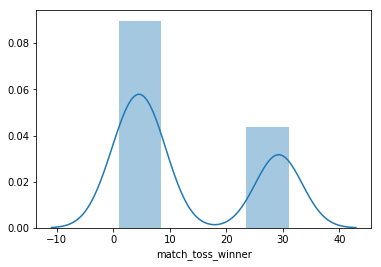

In [184]:
#Univariate analysis in accordance to match_toss_winner
univariate(match_df.match_toss_winner)

count    232.000000
mean      10.284483
std       11.717310
min        0.000000
25%        2.000000
50%        4.500000
75%       28.000000
max       31.000000
Name: result_winning_team_id, dtype: float64


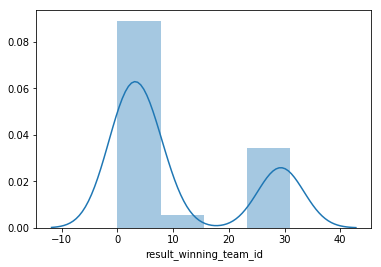

In [185]:
#Univariate analysis in accordance to team_0_raid_successful
univariate(match_df.result_winning_team_id)

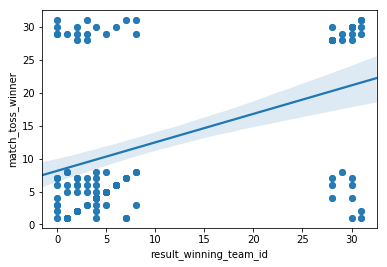

In [186]:
# Bivariate analysic with result_winning_team_id and match_toss_winner
bivariate(match_df.result_winning_team_id, match_df.match_toss_winner)

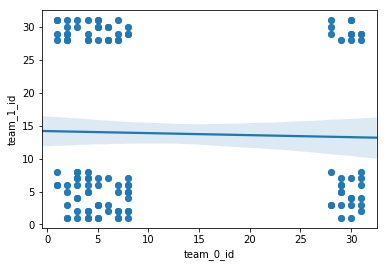

In [187]:
# Bivariate analysic with result_winning_team_id and match_toss_winner
bivariate(match_df.team_0_id, match_df.team_1_id)

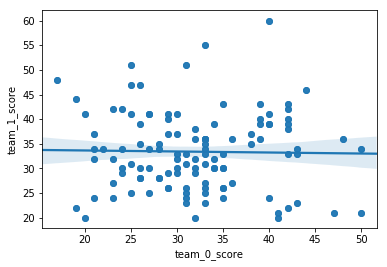

In [188]:
# Bivariate analysic with team_0_score and team_1_score
bivariate(match_df.team_0_score, match_df.team_1_score)

<Figure size 1440x432 with 0 Axes>

Text(0.5,1,'Winning Team Distribution')

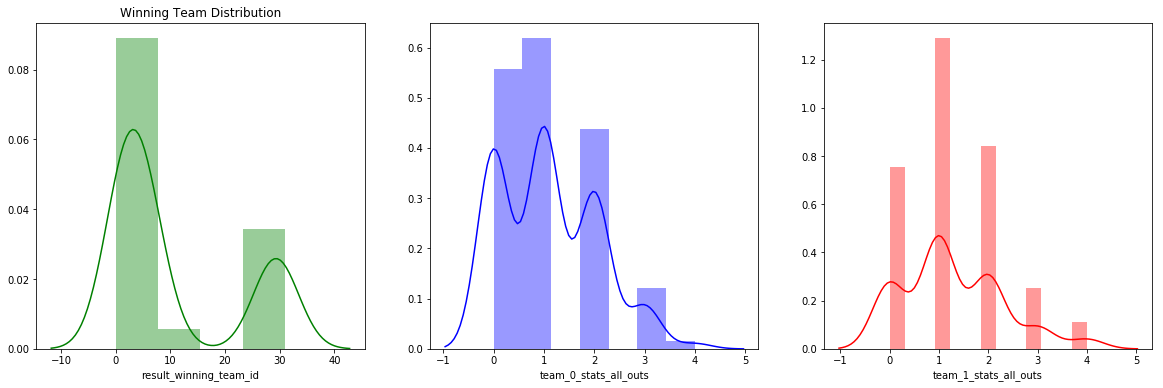

In [189]:
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title('Winning Team Distribution')
sns.distplot(match_df['result_winning_team_id'],color='green')

# subplot 2
plt.subplot(1, 3, 2)
sns.distplot(match_df['team_0_stats_all_outs'],color='blue')

# subplot 3l
plt.subplot(1, 3, 3)
sns.distplot(match_df['team_1_stats_all_outs'],color='red')

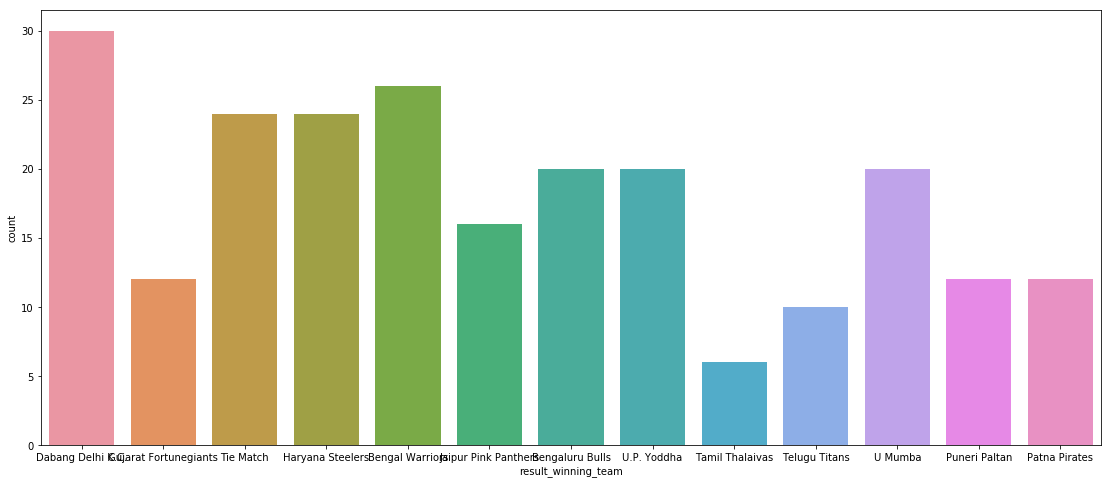

In [190]:
fig, ax = plt.subplots(figsize=(200,8))
width = len(match_df['result_winning_team'].unique()) + 6
fig.set_size_inches(width , 8)
ax=sns.countplot(data = match_df, x= 'result_winning_team') 


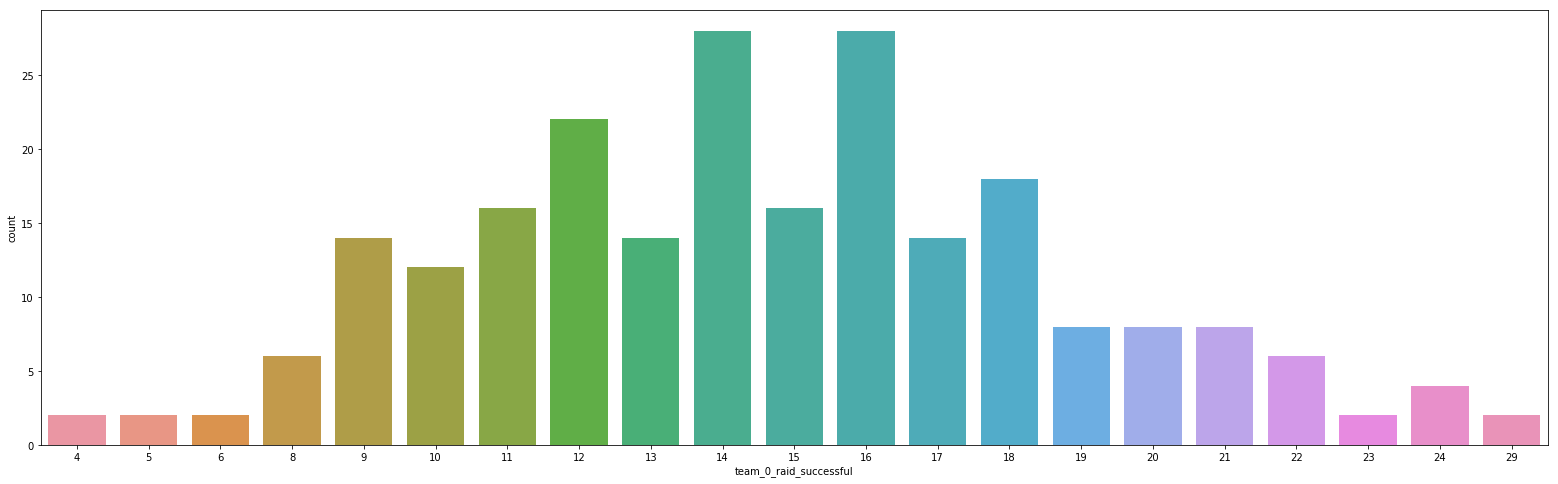

In [191]:
fig, ax = plt.subplots(figsize=(200,8))
width = len(match_df['team_0_raid_successful'].unique()) + 6
fig.set_size_inches(width , 8)
ax=sns.countplot(data = match_df, x= 'team_0_raid_successful') 

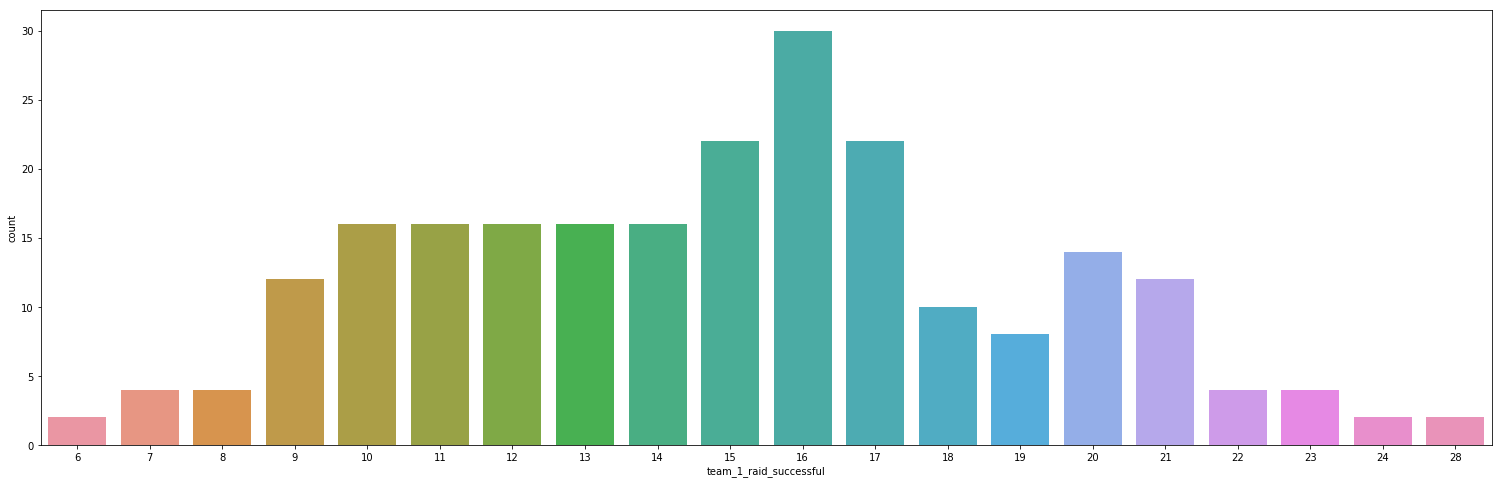

In [192]:
fig, ax = plt.subplots(figsize=(200,8))
width = len(match_df['team_1_raid_successful'].unique()) + 6
fig.set_size_inches(width , 8)
ax=sns.countplot(data = match_df, x= 'team_1_raid_successful') 

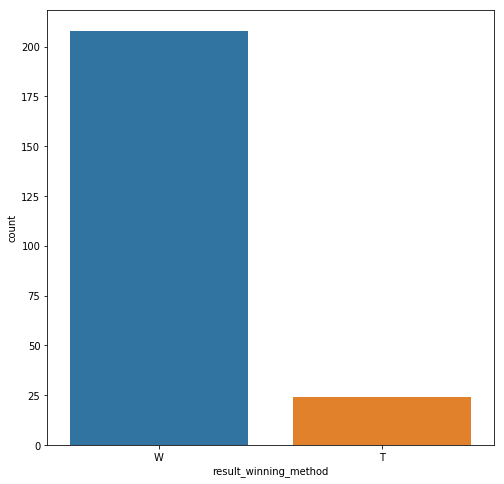

In [193]:

fig, ax = plt.subplots(figsize=(200,8))
width = len(match_df['result_winning_method'].unique()) + 6
fig.set_size_inches(width , 8)
ax=sns.countplot(data = match_df, x= 'result_winning_method')

In [194]:
 season_7_teams = ['Dabang Delhi K.C.',
 'Bengal Warriors',
 'Haryana Steelers',
 'U Mumba',
 'Bengaluru Bulls',
 'U.P. Yoddha',
 'Jaipur Pink Panthers',
 'Puneri Paltan',
 'Patna Pirates',
 'Gujarat Fortunegiants',
 'Telugu Titans',
 'Tamil Thalaivas']

df_teams_1 = match_df[match_df['team_0_name'].isin(season_7_teams)]
df_teams_2 = match_df[match_df['team_1_name'].isin(season_7_teams)]
df_teams = pd.concat((df_teams_1, df_teams_2))
df_teams.drop_duplicates()
df_teams.head()

,match_match_id,match_match_number,match_matchtime_iso,result_winning_method,result_winning_team,result_winning_team_id,match_toss_winner,team_0_green_card_count,team_0_id,team_0_name,...,team_1_stats_points_total,team_1_raid_Empty,team_1_raid_successful,team_1_raid_super_raids,team_1_raid_total,team_1_raid_unsuccessful,team_1_tackle_successful,team_1_tackle_super_tackles,team_1_tackle_total,team_1_tackle_unsuccessful
0,1692,Match 8,2019-07-24 15:00:00,W,Dabang Delhi K.C.,2,2,1,8,Telugu Titans,...,34,12,23,0,39,4,6,1,24,18
1,1693,Match 9,2019-07-25 14:00:00,W,Dabang Delhi K.C.,2,29,0,2,Dabang Delhi K.C.,...,29,17,11,0,37,9,10,2,21,11
2,1698,Match 14,2019-07-28 14:00:00,W,Dabang Delhi K.C.,2,28,0,2,Dabang Delhi K.C.,...,21,14,12,0,36,10,4,0,23,19
3,1704,Match 20,2019-08-01 14:00:00,W,Gujarat Fortunegiants,31,2,0,31,Gujarat Fortunegiants,...,26,18,11,0,39,10,8,1,19,11
4,1711,Match 27,2019-08-05 14:00:00,W,Dabang Delhi K.C.,2,2,0,2,Dabang Delhi K.C.,...,24,15,13,1,38,10,3,0,21,18
5,1719,Match 35,2019-08-10 15:00:00,W,Dabang Delhi K.C.,2,7,0,7,Puneri Paltan,...,32,17,19,0,42,6,9,0,23,14
6,1730,Match 46,2019-08-17 15:00:00,T,Tie Match,0,2,0,4,Bengal Warriors,...,30,15,16,0,38,7,6,1,20,14
7,1740,Match 56,2019-08-24 14:00:00,W,Dabang Delhi K.C.,2,2,0,2,Dabang Delhi K.C.,...,31,16,16,0,42,10,10,0,19,9
8,1743,Match 59,2019-08-25 15:00:00,W,Dabang Delhi K.C.,2,30,0,2,Dabang Delhi K.C.,...,27,18,13,1,42,11,8,1,23,15
9,1747,Match 63,2019-08-28 15:00:00,W,Dabang Delhi K.C.,2,5,0,2,Dabang Delhi K.C.,...,24,16,10,0,42,16,8,2,24,16


,match_match_id,match_match_number,match_matchtime_iso,result_winning_method,result_winning_team,result_winning_team_id,match_toss_winner,team_0_green_card_count,team_0_id,team_0_name,...,team_1_stats_points_total,team_1_raid_Empty,team_1_raid_successful,team_1_raid_super_raids,team_1_raid_total,team_1_raid_unsuccessful,team_1_tackle_successful,team_1_tackle_super_tackles,team_1_tackle_total,team_1_tackle_unsuccessful
0,1692,Match 8,2019-07-24 15:00:00,W,Dabang Delhi K.C.,2,2,1,8,Telugu Titans,...,34,12,23,0,39,4,6,1,24,18
1,1693,Match 9,2019-07-25 14:00:00,W,Dabang Delhi K.C.,2,29,0,2,Dabang Delhi K.C.,...,29,17,11,0,37,9,10,2,21,11
2,1698,Match 14,2019-07-28 14:00:00,W,Dabang Delhi K.C.,2,28,0,2,Dabang Delhi K.C.,...,21,14,12,0,36,10,4,0,23,19
3,1704,Match 20,2019-08-01 14:00:00,W,Gujarat Fortunegiants,31,2,0,31,Gujarat Fortunegiants,...,26,18,11,0,39,10,8,1,19,11
4,1711,Match 27,2019-08-05 14:00:00,W,Dabang Delhi K.C.,2,2,0,2,Dabang Delhi K.C.,...,24,15,13,1,38,10,3,0,21,18


In [195]:
#New column introduce as winner to decide predictions
df_teams['winner'] = np.where(df_teams.team_0_id==df_teams.result_winning_team_id,1, np.where(df_teams.team_1_id==df_teams.result_winning_team_id, 2,3))

In [196]:
df_teams = df_teams[['team_0_name','team_1_name','winner']]
df_teams.rename(columns={'team_0_name':'Team_1','team_1_name':'Team_2'}, inplace=True)
df_teams.head()

,Team_1,Team_2,winner
0,Telugu Titans,Dabang Delhi K.C.,2
1,Dabang Delhi K.C.,Tamil Thalaivas,1
2,Dabang Delhi K.C.,Haryana Steelers,1
3,Gujarat Fortunegiants,Dabang Delhi K.C.,1
4,Dabang Delhi K.C.,Jaipur Pink Panthers,1


In [197]:
final_predict = pd.get_dummies(df_teams, prefix=['Team_1', 'Team_2'], columns=['Team_1', 'Team_2'])

X = final_predict.drop(['winner'], axis=1)
y = final_predict["winner"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [198]:
#Model implemented to predit team data
rf = RandomForestClassifier(n_estimators=100, max_depth=20,random_state=0) 
rf.fit(X_train, y_train)
score = rf.score(X_train, y_train)
score2 = rf.score(X_test, y_test)
print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

Training set accuracy:  0.889
Test set accuracy:  0.800


In [212]:
#Extracting rank and total poins related data
#Json file opening, parsing in strin and flattened after that data frame is creating.
f = open('stats_team.json')
data = json.load(f)
f.close()
data_flattened = [flatten(d) for d in data]
#print(data_flattened)
rank_df = pd.DataFrame(data_flattened)
#list(rank_df.columns)
rank_df = rank_df[['bio_team_id','bio_team_name','over_all_stats_rank','over_all_stats_points','over_all_stats_success_raids','over_all_stats_success_tackles','over_all_stats_super_raids','over_all_stats_super_tackles']]
rank_df.head()

,bio_team_id,bio_team_name,over_all_stats_rank,over_all_stats_points,over_all_stats_success_raids,over_all_stats_success_tackles,over_all_stats_super_raids,over_all_stats_super_tackles
0,2,Dabang Delhi K.C.,1,72,292,155,7,7
1,4,Bengal Warriors,2,68,299,166,15,12
2,28,Haryana Steelers,3,59,259,165,12,11
3,5,U Mumba,4,53,219,155,7,16
4,1,Bengaluru Bulls,4,53,294,158,7,25


In [209]:
#Total matches will be 12 * 11 = 132
#team_standing = team for teama in season_7_teams for teamb in season_7_teams if teama != teamb
#team_standing = set(season_7_teams) & set(season_7_teams)
team_standing_a = []
team_standing_b = []
for teama in season_7_teams:
    for teamb in season_7_teams:
        if(teama != teamb):
            team_standing_a.append(teama)
            team_standing_b.append(teamb)
team_standing = pd.DataFrame({
    'Team_1': team_standing_a,
    'Team_2': team_standing_b})    
team_standing.head()

,Team_1,Team_2
0,Dabang Delhi K.C.,Bengal Warriors
1,Dabang Delhi K.C.,Haryana Steelers
2,Dabang Delhi K.C.,U Mumba
3,Dabang Delhi K.C.,Bengaluru Bulls
4,Dabang Delhi K.C.,U.P. Yoddha


In [201]:

team_standing.insert(1, 'first_position', team_standing['Team_1'].map(rank_df.set_index('bio_team_name')['over_all_stats_rank']))
team_standing.insert(2, 'second_position', team_standing['Team_2'].map(rank_df.set_index('bio_team_name')['over_all_stats_rank']))
team_standing.tail()

,Team_1,first_position,second_position,Team_2
127,Tamil Thalaivas,12,7,Jaipur Pink Panthers
128,Tamil Thalaivas,12,8,Puneri Paltan
129,Tamil Thalaivas,12,9,Patna Pirates
130,Tamil Thalaivas,12,9,Gujarat Fortunegiants
131,Tamil Thalaivas,12,11,Telugu Titans


In [202]:
pred_set = []
for index, row in team_standing.iterrows():
    if row['first_position'] < row['second_position']:
        pred_set.append({'Team_1': row['Team_1'], 'Team_2': row['Team_2'], 'winner': None})
    else:
        pred_set.append({'Team_1': row['Team_2'], 'Team_2': row['Team_1'], 'winner': None})
        
pred_set = pd.DataFrame(pred_set)
backup_pred_set = pred_set
pred_set.head()

,Team_1,Team_2,winner
0,Dabang Delhi K.C.,Bengal Warriors,None
1,Dabang Delhi K.C.,Haryana Steelers,None
2,Dabang Delhi K.C.,U Mumba,None
3,Dabang Delhi K.C.,Bengaluru Bulls,None
4,Dabang Delhi K.C.,U.P. Yoddha,None


In [203]:
pred_set = pd.get_dummies(pred_set, prefix=['Team_1', 'Team_2'], columns=['Team_1', 'Team_2'])

missing_cols = set(final_predict.columns) - set(pred_set.columns)
for c in missing_cols:
    pred_set[c] = 0
pred_set = pred_set[final_predict.columns]


pred_set = pred_set.drop(['winner'], axis=1)
pred_set.head()

,Team_1_Bengal Warriors,Team_1_Bengaluru Bulls,Team_1_Dabang Delhi K.C.,Team_1_Gujarat Fortunegiants,Team_1_Haryana Steelers,Team_1_Jaipur Pink Panthers,Team_1_Patna Pirates,Team_1_Puneri Paltan,Team_1_Tamil Thalaivas,Team_1_Telugu Titans,...,Team_2_Dabang Delhi K.C.,Team_2_Gujarat Fortunegiants,Team_2_Haryana Steelers,Team_2_Jaipur Pink Panthers,Team_2_Patna Pirates,Team_2_Puneri Paltan,Team_2_Tamil Thalaivas,Team_2_Telugu Titans,Team_2_U Mumba,Team_2_U.P. Yoddha
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [204]:
predictions = rf.predict(pred_set)
for i in range(team_standing.shape[0]):
    print(backup_pred_set.iloc[i, 1] + " and " + backup_pred_set.iloc[i, 0])
    if predictions[i] == 1:
        print("Winner: " + backup_pred_set.iloc[i, 1])
    
    else:
        print("Winner: " + backup_pred_set.iloc[i, 0])
    print("")

Bengal Warriors and Dabang Delhi K.C.
Winner: Bengal Warriors

Haryana Steelers and Dabang Delhi K.C.
Winner: Dabang Delhi K.C.

U Mumba and Dabang Delhi K.C.
Winner: U Mumba

Bengaluru Bulls and Dabang Delhi K.C.
Winner: Bengaluru Bulls

U.P. Yoddha and Dabang Delhi K.C.
Winner: U.P. Yoddha

Jaipur Pink Panthers and Dabang Delhi K.C.
Winner: Jaipur Pink Panthers

Puneri Paltan and Dabang Delhi K.C.
Winner: Puneri Paltan

Patna Pirates and Dabang Delhi K.C.
Winner: Patna Pirates

Gujarat Fortunegiants and Dabang Delhi K.C.
Winner: Gujarat Fortunegiants

Telugu Titans and Dabang Delhi K.C.
Winner: Telugu Titans

Tamil Thalaivas and Dabang Delhi K.C.
Winner: Tamil Thalaivas

Bengal Warriors and Dabang Delhi K.C.
Winner: Bengal Warriors

Haryana Steelers and Bengal Warriors
Winner: Bengal Warriors

U Mumba and Bengal Warriors
Winner: U Mumba

Bengaluru Bulls and Bengal Warriors
Winner: Bengal Warriors

U.P. Yoddha and Bengal Warriors
Winner: U.P. Yoddha

Jaipur Pink Panthers and Bengal Wa

In [205]:
def clean_and_predict(matches, ranking, final, rf):
    positions = []
    for match in matches:
        positions.append(ranking.loc[ranking['bio_team_name'] == match[0],'over_all_stats_rank'].iloc[0])
        positions.append(ranking.loc[ranking['bio_team_name'] == match[1],'over_all_stats_rank'].iloc[0])

    pred_set = []

    i = 0
    j = 0

    while i < len(positions):
        dict1 = {}

        if positions[i] < positions[i + 1]:
            dict1.update({'Team_1': matches[j][0], 'Team_2': matches[j][1]})
        else:
            dict1.update({'Team_1': matches[j][1], 'Team_2': matches[j][0]})

        pred_set.append(dict1)
        i += 2
        j += 1
        
    pred_set = pd.DataFrame(pred_set)
    backup_pred_set = pred_set

    pred_set = pd.get_dummies(pred_set, prefix=['Team_1', 'Team_2'], columns=['Team_1', 'Team_2'])
    missing_cols2 = set(final.columns) - set(pred_set.columns)
    for c in missing_cols2:
        pred_set[c] = 0
    pred_set = pred_set[final.columns]

    pred_set = pred_set.drop(['winner'], axis=1)

    predictions = rf.predict(pred_set)
    for i in range(len(pred_set)):
        print(backup_pred_set.iloc[i, 1] + " and " + backup_pred_set.iloc[i, 0])
        if predictions[i] == 1:
            print("Winner: " + backup_pred_set.iloc[i, 1])
        else:
            print("Winner: " + backup_pred_set.iloc[i, 0])
        print("")

In [206]:
semi = [('Dabang Delhi K.C.', 'Bengal Warriors'),
            ('Haryana Steelers', 'Bengaluru Bulls')]
clean_and_predict(semi, rank_df, final_predict, rf)

Bengal Warriors and Dabang Delhi K.C.
Winner: Bengal Warriors

Bengaluru Bulls and Haryana Steelers
Winner: Haryana Steelers



In [207]:
#From the above prediction winner team is Bengal Warriors
final = [('Bengal Warriors','Haryana Steelers')]
clean_and_predict(final, rank_df, final_predict, rf)

Haryana Steelers and Bengal Warriors
Winner: Bengal Warriors



In [220]:
# Predict the top team in the points table after the completion of the league matches. 
rank_df[rank_df.over_all_stats_points == max(rank_df.over_all_stats_points)].bio_team_name	

0    Dabang Delhi K.C.
Name: bio_team_name, dtype: object

In [221]:
# Predict the team with the highest points for successful raids
rank_df[rank_df.over_all_stats_success_raids == max(rank_df.over_all_stats_success_raids)].bio_team_name	

1    Bengal Warriors
Name: bio_team_name, dtype: object

In [222]:
# Predict the team with the highest points for successful tackles
rank_df[rank_df.over_all_stats_success_tackles == max(rank_df.over_all_stats_success_tackles)].bio_team_name	

7    Puneri Paltan
Name: bio_team_name, dtype: object

In [223]:
# Predict the team with the highest super-performance total.
rank_df['highest_super'] = rank_df.over_all_stats_super_raids + rank_df.over_all_stats_super_tackles
rank_df[rank_df.highest_super == max(rank_df.highest_super)].bio_team_name	

6    Jaipur Pink Panthers
Name: bio_team_name, dtype: object